[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/4dsolutions/clarusway_data_analysis/HEAD?labpath=%2FDVwPY_S6)

---

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

![image.png](https://i.ibb.co/4PP9w2m/plotly-logo.png)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Interactive Plots with Plotly </p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 06 (Plotly)</p>

Plotly Express is a new Python visualization library that acts as a wrapper for Plotly, exposing a simple syntax for complex charts. It was inspired by Seaborn and ggplot2 and was specifically designed to have a terse, consistent, and easy-to-learn API: with a single import, you can make richly interactive plots with faceting, maps, animations, and trendlines in a single function call. 

Plotly Express includes over 30 functions for creating various types of figures. The API for these functions was carefully designed to be as consistent and easy to learn as possible, allowing you to easily switch from a scatter plot to a bar chart to a histogram to a sunburst chart during a data exploration session.

Nor are we confined to Plotly Express.  Just as Seaborn sits atop matplotlib, so does Express sit atop plotly which, used directly, is capable of lots of customization, in tandem with Express.

https://www.youtube.com/watch?v=GGL6U0k8WYA 

Derek Banas has a truly excellent tutorial, but he doesn't have time to talk much about some of what he imports or why.  

Will the Jupyter configuration also work in Colab?  Not without modifications.  Check out Binder.

Is the opening exactly the same if working in Anaconda?

We also now have Dash, ploty's flagship product.  The enterprise version costs something, but if you just want to test the waters...

* [Jupyter Dash on Binder: Getting Started](https://mybinder.org/v2/gh/plotly/jupyter-dash/044acaaecbc60a9b52108b0d03b02ce504a7cce3)
* [Saved Version of this Notebook](https://chart-studio.plotly.com/~pdx4d/1)

In [2]:
import pandas as pd
import numpy as np
import plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [3]:
import plotly.graph_objects as go

The two datasets used here are:

- [Melbourne Housing Snapshot](https://www.kaggle.com/datasets/gunjanpathak/melb-data)
- Superstore Sales Dataset

**[Plotly Official Page](https://plotly.com/python/)**

**[4 Reasons Why Plotly Is The Best Visualization Library](https://towardsdatascience.com/4-reasons-why-plotly-is-the-best-visualization-library-18c27de05b95)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [ ]:
# !pip install plotly

In [4]:
pd.__version__

'1.4.4'

In [5]:
cf.__version__

'0.17.3'

In [6]:
py.__version__

'5.9.0'

In [7]:
import matplotlib as mpl
mpl.__version__

'3.6.2'

In [8]:
sns.__version__

'0.12.1'

In [9]:
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

First, with tools we have used before, for contrast.  This scatter plot makes no attempt to provide a background map.

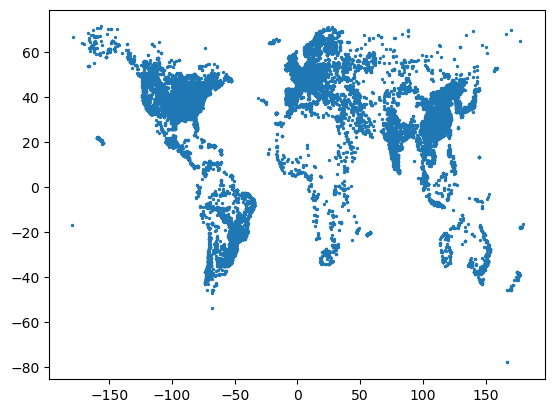

In [10]:
import matplotlib.pyplot as plt

df = pd.read_csv('Global-Power-Plant.csv')

plt.scatter(x=df['Longitude'], y=df['Latitude'], s=2)
plt.rcParams["figure.figsize"] = (50,35)
plt.show()

With plotly, we can do better, using the same pandas DataFrame as input.

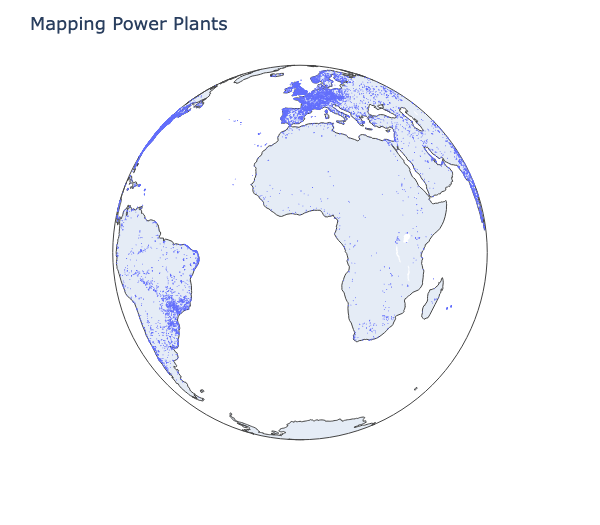

In [26]:
fig = px.scatter_geo(df, 
                     lat='Latitude', lon='Longitude', 
                     hover_name="Powerplant Name",
                     projection="orthographic",
                     width  = 1.5 * 500,
                     height = 1.5 * 350)

fig.update_traces(marker=dict(size=1))
fig.update_layout(title_text="Mapping Power Plants",
                  title_font_size=18)
fig.show()

In [13]:
import sqlite3
conn = sqlite3.connect("airports.db")
airports = pd.read_sql("SELECT * FROM Airports", conn)
conn.close()
airports.head()

iata iso                        name continent       type        lat  \
0  UTK  MH              Utirik Airport        OC    airport  11.233333   
1  FIV  US     Five Finger CG Heliport        NA   heliport        NaN   
2  FAK  US  False Island Seaplane Base        NA  seaplanes        NaN   
3  BWS  US    Blaine Municipal Airport        NA     closed        NaN   
4  WKK  US     Aleknagik / New Airport        NA    airport  59.277780   

         lon    size  status  
0  169.86667   small       1  
1        NaN    None       1  
2        NaN    None       1  
3        NaN    None       0  
4 -158.61111  medium       1

In [14]:
airports.describe(include='all').T

count unique                  top  freq       mean        std  \
iata         6726   6632                  PRI     3        NaN        NaN   
iso          6726    235                   US   682        NaN        NaN   
name         6247   6196  Santa Maria Airport     4        NaN        NaN   
continent    6726      6                   NA  1502        NaN        NaN   
type         6726      4              airport  6546        NaN        NaN   
lat        6345.0    NaN                  NaN   NaN  17.057357  29.607346   
lon        6345.0    NaN                  NaN   NaN  14.750609   88.34545   
size         6546      3               medium  3556        NaN        NaN   
status     6726.0    NaN                  NaN   NaN   0.990039   0.099316   

                 min       25%        50%        75%        max  
iata             NaN       NaN        NaN        NaN        NaN  
iso              NaN       NaN        NaN        NaN        NaN  
name             NaN       NaN        NaN        NaN        NaN  
continent        NaN       NaN        NaN        NaN        NaN  
type             NaN       NaN        NaN        NaN        NaN  
lat           -54.95 -7.288056       18.7  42.183376   82.51667  
lon       -179.33333 -68.07361  15.101389  96.201385  179.93333  
size             NaN       NaN        NaN        NaN        NaN  
status           0.0       1.0        1.0        1.0        1.0

In [15]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6726 entries, 0 to 6725
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   iata       6726 non-null   object 
 1   iso        6726 non-null   object 
 2   name       6247 non-null   object 
 3   continent  6726 non-null   object 
 4   type       6726 non-null   object 
 5   lat        6345 non-null   float64
 6   lon        6345 non-null   float64
 7   size       6546 non-null   object 
 8   status     6726 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 473.0+ KB


In [16]:
bigairportsquery = "SELECT iata, name, lat, lon FROM Airports WHERE type='airport' AND size='large'"
conn = sqlite3.connect("airports.db")
bigairports = pd.read_sql(bigairportsquery, conn)
conn.close()
bigairports.head()

iata                                         name        lat         lon
0  TJP    Areopuerto Internacional Michael Gonzalez  18.010702  -66.563545
1  AMC                                         None  11.033333   20.283333
2  POM  Port Moresby Jacksons International Airport  -9.444308  147.214460
3  KEF               Keflavik International Airport  63.997765  -22.624283
4  PRN                                         None  42.573612   21.035557

In [17]:
bigairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iata    505 non-null    object 
 1   name    473 non-null    object 
 2   lat     505 non-null    float64
 3   lon     505 non-null    float64
dtypes: float64(2), object(2)
memory usage: 15.9+ KB


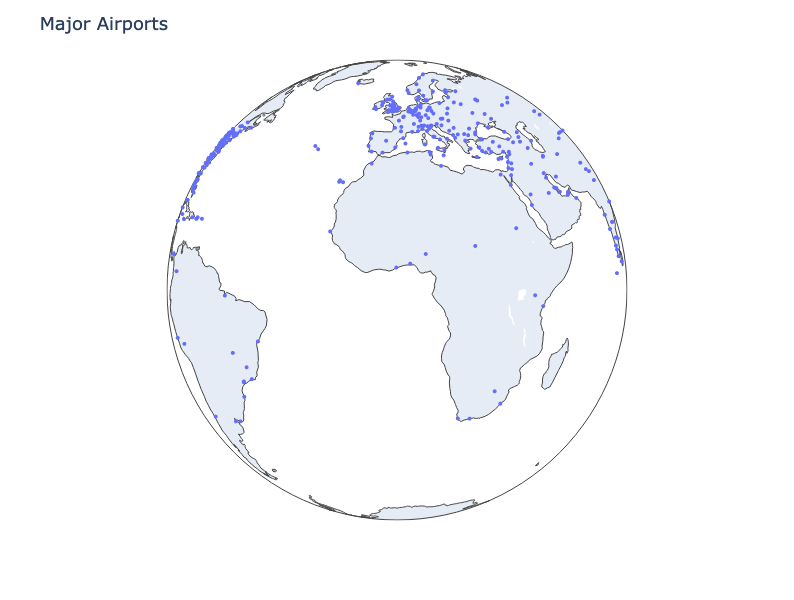

In [18]:
fig = px.scatter_geo(bigairports, 
                     lat='lat', lon='lon', 
                     hover_data= ["iata", "name"],
                     center = dict(lat=0, lon=0),
                     projection = "orthographic",
                     width=800,
                     height=600)

fig.update_traces(marker=dict(size=4))
fig.update_layout(title_text="Major Airports",
                  title_font_size=18)
fig.show()

In [20]:
plotly_data = pd.read_html("https://en.wikipedia.org/wiki/Plotly")
plotly_data[2].head(20)

Chart Type                  Chart Name JavaScript[25]  \
0                     Basic charts                Scatter plot           True   
1                     Basic charts                  Line chart           True   
2                     Basic charts                   Bar chart           True   
3                     Basic charts                   Pie chart           True   
4                     Basic charts                Bubble chart           True   
5                     Basic charts                    Dot plot           True   
6                     Basic charts            Filled area plot           True   
7                     Basic charts        Horizontal bar chart           True   
8                     Basic charts                 Gantt chart            NaN   
9                     Basic charts              Sunburst chart           True   
10                    Basic charts              Sankey diagram           True   
11                    Basic charts                 Point cloud           True   
12                    Basic charts                     Treemap           True   
13                    Basic charts                       Table           True   
14                    Basic charts               Dumbbell plot            NaN   
15  AI and machine learning charts               ML regression            NaN   
16  AI and machine learning charts          kNN classification            NaN   
17  AI and machine learning charts           ROC and PR curves            NaN   
18  AI and machine learning charts           PCA visualization            NaN   
19  AI and machine learning charts  t-SNE and UMAP projections            NaN   

   Python[26] R[27] Julia[28]  
0        True  True      True  
1        True  True      True  
2        True  True      True  
3        True  True      True  
4        True  True      True  
5        True  True      True  
6        True  True      True  
7        True  True      True  
8        True  True       NaN  
9        True  True      True  
10       True  True      True  
11        NaN   NaN      True  
12       True  True      True  
13       True  True      True  
14        NaN  True       NaN  
15       True   NaN       NaN  
16       True   NaN       NaN  
17       True   NaN       NaN  
18       True   NaN       NaN  
19       True   NaN       NaN

In [21]:
charts = plotly_data[2]

In [22]:
charts.rename(columns = {"JavaScript[25]":"JavaScript", "Python[26]":"Python", "R[27]":"R", "Julia[28]":"Julia"},
             inplace = True)
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Chart Type  89 non-null     object
 1   Chart Name  89 non-null     object
 2   JavaScript  65 non-null     object
 3   Python      80 non-null     object
 4   R           61 non-null     object
 5   Julia       65 non-null     object
dtypes: object(6)
memory usage: 4.3+ KB


In [23]:
charts.rename(columns = {"Chart Type":"Chart_Type", "Chart Name":"Chart_Name"},
             inplace = True)
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Chart_Type  89 non-null     object
 1   Chart_Name  89 non-null     object
 2   JavaScript  65 non-null     object
 3   Python      80 non-null     object
 4   R           61 non-null     object
 5   Julia       65 non-null     object
dtypes: object(6)
memory usage: 4.3+ KB


In [25]:
charts.tail(20)

Chart_Type               Chart_Name JavaScript Python     R Julia
69           Maps          Lines on Mapbox        NaN   True  True   NaN
70           Maps              Bubble maps       True   True  True  True
71           Maps    Scatter plots on maps       True   True  True  True
72           Maps  Scatter plots on Mapbox       True   True  True  True
73           Maps       Filled area on map       True   True  True  True
74           Maps            Mapbox hexbin        NaN   True   NaN   NaN
75      3D charts          3D scatter plot       True   True  True  True
76      3D charts              Ribbon plot       True    NaN   NaN  True
77      3D charts          3D surface plot       True   True  True  True
78      3D charts             3D mesh plot       True   True  True  True
79      3D charts             3D line plot       True   True  True  True
80      3D charts            Tri-surf plot       True   True  True  True
81      3D charts         3D cluster graph       True    NaN   NaN  True
82      3D charts             3D cone plot       True   True  True  True
83      3D charts       3D streamtube plot       True   True  True  True
84      3D charts       3D isosurface plot       True   True  True  True
85      3D charts          3D bubble chart        NaN   True   NaN   NaN
86      3D charts           3D volume plot        NaN   True   NaN   NaN
87       Subplots                 Subplots       True   True  True  True
88  Multiple Axes            Multiple Axes       True   True  True  True

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">READING THE DATASETS</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Melbourne data is a bit large, for the sake of simplicity, we are taking only 1000 data points from the dataset.

In [ ]:
melb = pd.read_csv("melb_data.csv.zip", index_col=0)
melb = melb[0:1000]

In [ ]:
melb.info()

In [ ]:
melb.head()

In [ ]:
sales = pd.read_csv("Superstore_Sales_Dataset.zip")
sales.head()

In [ ]:
sales.info()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">SCATTER PLOTS WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Scatterplots are a great way to analyze data distribution and the relation between various data fields. Various trends in data can be analyzed and plotted. Plotting scatter plots with Plotly is very easy. Let us make a scatter plot to understand the data distribution.

In [ ]:
fig = px.scatter(melb, x="Landsize", y="Price", color="Regionname")
fig.show()

In [ ]:
melb[melb.Landsize > 70000]

In [ ]:
melb2 = melb[melb.Landsize < 10000]

We can hover over the plots and see exact data values and other information. 

In [ ]:
px.scatter(melb2, x="Landsize", y="Price", color='Postcode', hover_data=[melb2.index])

In [ ]:
melb.drop(index=1198, inplace=True)

In [ ]:
fig = px.scatter(melb, x="Landsize", y="Price", color='Postcode', hover_data=[melb.index])
fig.show()

In [ ]:
melb.drop(index=41, inplace=True)

In [ ]:
fig = px.scatter(melb, x="Landsize", y="Price", color='Postcode', hover_data=[melb.index])
fig.show()

In [ ]:
fig = px.scatter(melb, x="Landsize", y="Price", color='Postcode')
fig.update_traces(marker_size=8)

In [ ]:
fig = px.scatter(melb, x="Lattitude", y="Longtitude", 
                 marginal_x="histogram", 
                 marginal_y="rug", 
                 color="Regionname")
fig.show()

In [ ]:
fig = px.scatter(melb, x="Price", y="YearBuilt", color="Rooms", facet_col="Type", )
fig.show()

In [ ]:
df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", color='petal_width')
fig.show()

In [ ]:
fig = px.scatter(df, y="petal_length", x="petal_width", color="species", symbol="species")
fig.update_traces(marker_size=10)

As seen above, Plotly represents really nice and well designed plots. In addition to scatterplots, Linear Regression plots can be made by using Plotly. Let us plot the linear relationship between total bills and tips in the Tips Dataset.

In [ ]:
# linear regression

tips = px.data.tips()

fig = px.scatter(tips, x="total_bill", y="tip", trendline="ols")
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">LINE PLOTS WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Line plots are great in visualizing continuous data. Time series data, mathematical functions etc are some of the data which can be plotted using Line Plots. They reveal data trends, maxima and minima. We can use them for time series data like stocks, sales over time and so on. It is a great way to plot a 2D relationship. Let us make a line plot to understand the data distribution.

In [ ]:
df = px.data.stocks()
df.head()

In [ ]:
df = px.data.stocks()

fig = px.line(df, x='date', y="MSFT")
fig.show()

In [ ]:
fig = px.line(df, x='date', y=["MSFT","GOOG",'FB',"AMZN"])
fig.show()

In [ ]:
df = pd.read_csv("store_sharing.csv")
df.head(3)

In [ ]:
df.info()

In [ ]:
df.timestamp = pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

In [ ]:
df.set_index('timestamp', inplace=True)
df.head(3)

In [ ]:
f = lambda x: x.strftime('%Y-%m') # strftime works with array

df['year_month'] = f(df.index)
df['year'] = df.index.year  # only apply to array
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

df.head(3)

In [ ]:
df_month_sum = pd.DataFrame(df.groupby('year_month').cnt.sum())
df_month_sum

In [ ]:
fig = px.line(df_month_sum, x=df_month_sum.index, y='cnt')
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BAR PLOTS WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A bar chart is a way of summarizing a set of categorical data. The bar chart displays data using a number of bars, each representing a particular category. Barplots are used to provide a straightforward comparison of data. They represent categorical data with rectangular bars of variable height. Plotting bar charts in Plotly is very easy and simple. Let us make a bar plot to understand the data distribution.

In [ ]:
melb.head(3)

In [ ]:
fig = px.bar(melb, x='Suburb', y='Price', color="Regionname")
fig.show()

In [ ]:
melb.Method.unique()

In [ ]:
fig = px.bar(melb, 
             x='Suburb', 
             y='Price', 
             color="Regionname", 
             pattern_shape="Method", 
             pattern_shape_sequence=[".", "x", "+", "/", "\\"])
fig.show()

**What is** **[Gapminder](https://www.gapminder.org/)** **& What does it do?**

Gapminder Foundation is an organization dedicated to educating the public by using data to dispel common myths about the so-called developing world. The organization uses **[data](https://www.gapminder.org/data/)** to show how actual trends in health and economics contradict the narratives that emanate from sensationalist media coverage of catastrophes, tragedies, and other unfortunate events.

Its mission is to fight devastating ignorance with a fact-based worldview everyone can understand.

Gapminder identifies systematic misconceptions about important global trends and proportions and uses reliable data to develop easy to understand teaching materials to rid people of their misconceptions.

In [ ]:
data = px.data.gapminder()
data_canada = data[data.country == 'Canada']

fig = px.bar(data_canada, 
             x='year', 
             y='pop',
             hover_data=['lifeExp', 'gdpPercap'], 
             color='lifeExp',
             labels={'pop':'population of Canada'}, 
             height=400)
fig.show()

In [ ]:
df = px.data.gapminder().query("continent == 'Oceania'")
df.head(3)

In [ ]:
fig = px.bar(df, x='year', y='pop', barmode='stack', color='country')
fig.show()

Stacked bar charts show the summation of individual entries as well the entire plot. So, it is a good way to understand the contribution of each individual factor towards a complete entity.

**Let us plot the populations of the most populous nations in Asia.**

In [ ]:
df = px.data.gapminder().query("continent == 'Asia' and year == 2007and pop > 8000000")

fig = px.bar(df, 
             y='pop', 
             x='country', 
             text='pop')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">HORIZONTAL BAR PLOTS WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Exactly similar to Bar chart, a horizontal bar graph can be created by changing the orientation of the plot. px.bar() has an optional parameter to specify the orientation. To plot a Bar Plot horizontally using Plotly, we can set the orientation argument to h (as opposed to the default v) while plotting the Bar Plot:

In [ ]:
fig = px.bar(data_canada, 
             x='year', 
             y='pop', 
             orientation='h')
fig.show()

In [ ]:
df = px.data.gapminder().query("continent == 'Asia' and year == 2007and pop > 8000000")

fig = px.bar(df, 
             x='pop', 
             y='country')
fig.show()

In [ ]:
# ? pd.read_excel

In [ ]:
# Telecom Churn Dataset.xls
df = pd.read_csv("https://raw.githubusercontent.com/mmcuri/ds_handson/master/data/telecom/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

In [ ]:
fig = px.bar(df, 
             x='MonthlyCharges', 
             y='tenure', 
             color='tenure', 
             orientation='h')

fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">GANTT CHART WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A Gantt chart is a type of bar chart that illustrates a project schedule. The chart lists the tasks to be performed on the vertical axis, and time intervals on the horizontal axis. The width of the horizontal bars in the graph shows the duration of each activity based on their timelines and progress.

In [ ]:
df = pd.DataFrame([
                   dict(Task="Development", Start='2012-01-20', Finish='2012-02-20'),
                   dict(Task="Website Design", Start='2012-01-10', Finish='2012-01-30'),
                   dict(Task="Deployment", Start='2012-02-20', Finish='2012-03-30'),
                   dict(Task="Marketing", Start='2012-02-25', Finish='2012-04-15')
                   ])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task")
fig.update_yaxes(autorange="reversed") 
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PIE CHARTS WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Pie charts are used to understand the composition of data and analyse part to whole relationships in data. Piecharts ( and doughnut charts) plot the percentage composition of a value, as compared to the entire data/value.

In [ ]:
sales.head(3)

In [ ]:
TotalSales_by_States = sales.groupby("State")["Sales"].sum()
TotalSales_by_States

In [ ]:
fig = px.pie(TotalSales_by_States, 
             values=TotalSales_by_States.values, 
             names=TotalSales_by_States.index, 
             title='Sales by States in US')
fig.show()

In [ ]:
fig = px.pie(sales, 
             values='Sales', 
             names='Sub-Category', 
             title='Sales by Sub-Category in US',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
fig = px.pie(sales, 
             values='Sales', 
             names='Category', 
             title='Sales by Category in US')
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=sales['Category'], 
                             values=sales['Sales'], 
                             title='Sales by Category in US', 
                             pull=[0.1, 0.2, 0.1])])
fig.show()

In [ ]:
fig = px.pie(sales, 
             values='Sales', 
             names='Category', 
             title='Sales by Category in US', 
             hole=.3)
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BUBBLE CHARTS WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A bubble chart is a scatter plot in which a third dimension of the data is shown through the size of markers. The bubble chart in Plotly is created using the scatter plot. It can be created using the scatter() method of plotly.express. A bubble chart is a data visualization which helps to displays multiple circles (bubbles) in a two-dimensional plot as same in scatter plot. A bubble chart is primarily used to depict and show relationships between numeric variables.

In [ ]:
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), 
                 x="gdpPercap", 
                 y="lifeExp",
                 size="pop", 
                 color="continent",
                 hover_name="country", 
                 log_x=True, 
                 size_max=60)
fig.show()

In [ ]:
melb.head(3)

In [ ]:
fig = px.scatter(melb, 
                 x="Landsize", 
                 y="Price",
                 size="Price", 
                 color="Postcode",
                 hover_name="Regionname", 
                 log_x=True, 
                 size_max=30)
fig.show()

In [ ]:
df = px.data.gapminder().query("year==2007")

fig = px.scatter_geo(df, 
                     locations="iso_alpha", 
                     color="continent",
                     hover_name="country", 
                     size="pop",
                     projection="natural earth")
fig.show()

**Bubble Map with animation**

In [ ]:
df = px.data.gapminder()

fig = px.scatter_geo(df, 
                     locations="iso_alpha", 
                     color="continent",
                     hover_name="country", 
                     size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BOXPLOT WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A box plot is a statistical representation of the distribution of a variable through its quartiles. The ends of the box represent the lower and upper quartiles, while the median (second quartile) is marked by a line inside the box. For other statistical representations of numerical data.

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(3)

In [ ]:
fig = px.box(df, y="math score")
fig.show()

The minimum on a box plot shows the lowest data point except for some of the outliers.

The maximum shows the largest numerical data point.

Median is the middle value of the data distribution.

Then, the lower quartile is the 25 percentile and the upper quartile is the 75 percentile.

Let us try some customised box plots.

In [ ]:
fig = px.box(df, 
             x='gender', 
             y="math score")
fig.show()

In [ ]:
fig = px.box(df, 
             x='gender', 
             y="math score", 
             points="all")
fig.show()

In [ ]:
fig = px.box(df, 
             x='gender', 
             y="math score", 
             color="test preparation course")
fig.show()

In [ ]:
fig = px.box(df, 
             x='gender', 
             y="math score", 
             color="test preparation course", 
             notched=True)
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">HISTOGRAM WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In statistics, a histogram is representation of the distribution of numerical data, where the data are binned and the count for each bin is represented. More generally, in Plotly a histogram is an aggregated bar chart, with several possible aggregation functions (e.g. sum, average, count...) which can be used to visualize data on categorical and date axes as well as linear axes.

In [ ]:
fig = px.histogram(df, 
                   x="math score", 
                   nbins=20, 
                   color="gender")
fig.show()

In [ ]:
fig = px.histogram(df, 
                   x="math score", 
                   nbins=20, 
                   color="gender", 
                   marginal="rug")
fig.show()

In [ ]:
fig = px.histogram(df, 
                   x="reading score", 
                   y="math score", 
                   color="gender", 
                   marginal="box",
                   hover_data=df.columns)
fig.show()

In [ ]:
df.columns

In [ ]:
fig = px.histogram(df, 
                   x="reading score", 
                   y="writing score", 
                   color="parental level of education",
                   marginal="box",
                   hover_data=df.columns)
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BONUS</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

# read in volcano database data
df = pd.read_csv(
                "https://raw.githubusercontent.com/plotly/datasets/master/volcano_db.csv",
                encoding="iso-8859-1",
                )

# frequency of Country
freq = df
freq = freq.Country.value_counts().reset_index().rename(columns={"index": "x"})

# read in 3d volcano surface data
df_v = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.4, 0.6],
    specs=[[{"type": "scattergeo", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "surface"}]])

# Add scattergeo globe map of volcano locations
fig.add_trace(
    go.Scattergeo(lat=df["Latitude"],
                  lon=df["Longitude"],
                  mode="markers",
                  hoverinfo="text",
                  showlegend=False,
                  marker=dict(color="crimson", size=4, opacity=0.8)),
    row=1, col=1
)

# Add locations bar chart
fig.add_trace(
              go.Bar(x=freq["x"][0:10],y=freq["Country"][0:10], marker=dict(color="crimson"), showlegend=False),
              row=1, col=2
              )

# Add 3d surface of volcano
fig.add_trace(
              go.Surface(z=df_v.values.tolist(), showscale=False),
              row=2, col=2
              )

# Update geo subplot properties
fig.update_geos(
                projection_type="orthographic",
                landcolor="white",
                oceancolor="MidnightBlue",
                showocean=True,
                lakecolor="LightBlue"
                )

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Set theme, margin, and annotation in layout
fig.update_layout(
                  template="plotly_dark",
                  margin=dict(r=10, t=25, b=40, l=60),
                  annotations=[
                      dict(
                          text="Source: NOAA",
                          showarrow=False,
                          xref="paper",
                          yref="paper",
                          x=0,
                          y=0)
                              ]
                  )

fig.show()

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

___